## Paintball Plots in Python ##
**Tyler Wixtrom**<br>
*Texas Tech University*<br>

Unidata Users Workshop<br>
*June 25-28, 2018<br>
Boulder, CO*

In this example, we will create paintball plots of simulated reflectivity greater than 25 dBz 

In [1]:
import numpy as np
import operator as op
from netCDF4 import Dataset, num2date

The data for each ensemble member is contained in its own netCDF4 file found in the sample dataset. We will use the netCDF4-python package (http://unidata.github.io/netcdf4-python/) to open each member and store the data in a dictionary.

In [2]:
refl = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    refl['mem'+str(i)] = data.variables['DBZ'][:].data

In [3]:
lat = data.variables['lat'][0, :]
lon = data.variables['lon'][0, :]
vtimes = num2date(data.variables['valid_time'][:], data.variables['valid_time'].units)

### Paintballs ###
Paintball plots are simply scatter plots of thresholded data color-coded by ensemble member. This means that the first step will be to create a new set of data where a value of 1 represents a point greater than the threshold and a value of 0 represents a point less than the threshold.

In [4]:
def paintballs(thresh, operator, *args):
    """Return masked fields for paintball plots"""
    ret = []
    for arg in args:
        data = np.zeros_like(arg)
        data[operator(arg, thresh)] = 1.
        ret.append(data)
    return ret

In [5]:
refl_paintballs = paintballs(25, op.gt, *[refl[key] for key in refl.keys()])

### Plotting the Paintballs ###
To create the paintball plots, we will use the cartopy package (https://scitools.org.uk/cartopy/docs/latest/) for geographic reference, and the Matplotlib package (https://matplotlib.org) for plotting.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up our projection
plotcrs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale='50m',
    facecolor='none')

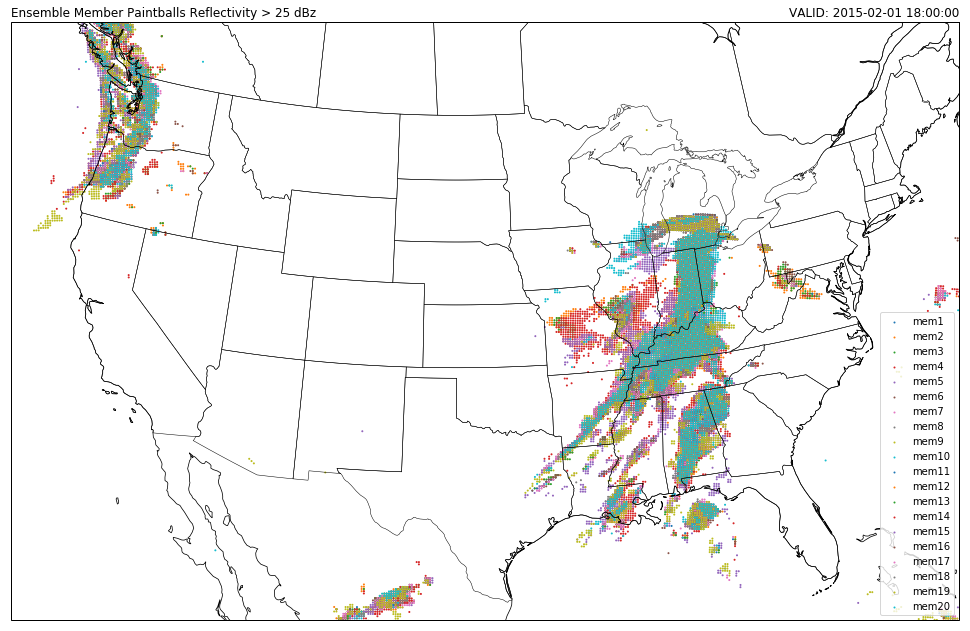

In [7]:
# Choose a time to plot
time = 2

# Set up the figure and add a map background
fig = plt.figure(1, figsize=(17., 12.))
ax = plt.subplot(111, projection=plotcrs)
ax.set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

# Plot the paintballs
for i in range(len(refl_paintballs)):
    data = refl_paintballs[i][time,]
    ax.scatter(lon[data == 1], lat[data == 1], data[data == 1], transform=ccrs.PlateCarree(), label='mem'+str(i+1))

# Make some titles and legend
plt.title('Ensemble Member Paintballs Reflectivity > 25 dBz', loc='left')
plt.title('VALID: %s' % (vtimes[time]), loc='right')
plt.legend(loc=4)
plt.show()

### Your Turn! ###
Fill in the blanks in the code below to plot paintballs of timestep accumulated precipitation greater than 10 mm for forecast hour 3

In [ ]:
# Read in the data for timestep precipitation (timestep_pcp)
pcp = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    
    # add in the correct variable name for timestep precipitation
    pcp['mem'+str(i)] = data.variables[''][:].data          ###### Complete this line #########

In [ ]:
# Create the thresholded fields (greater than 10 mm)
pcp_paintballs = paintballs()        ##### Complete this line #########

In [ ]:
# Plot the paintballs

# Choose a time to plot
time = 

# Set up the figure and add a map background
fig = plt.figure(1, figsize=(17., 12.))
ax = plt.subplot(111, projection=plotcrs)
ax.set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

# Plot the paintballs as in the above example
for i in range(len(pcp_paintballs)):
    ###### Add the plotting commands here #######

# Make some titles and legend
plt.title('Ensemble Member Paintballs Timestep Precipitation > 10 mm', loc='left')
plt.title('VALID: %s' % (vtimes[time]), loc='right')
plt.legend(loc=4)
plt.show()

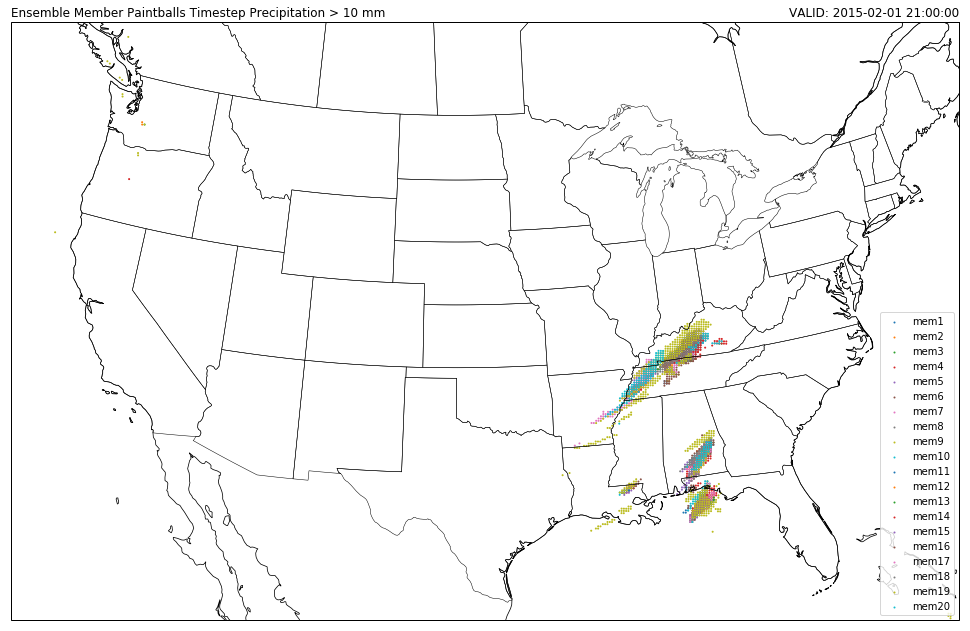

In [9]:
# %load solutions/paintballs_solution.py